In [55]:
# Import necessary modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline 
# %config InlineBackend.figure_format = 'retina' ## This is preferable for retina display. 

import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning



import os ## imporing os
print(os.listdir("./solution/"))

['gender_submission.csv', 'test.csv', 'titanic_with_labels.csv', 'train.csv']


In [56]:
## Importing the datasets
train = pd.read_csv('./solution/train.csv')
test = pd.read_csv('./solution/test.csv')

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
temp = train.groupby("Sex")['Age'].min().to_frame().reset_index()

In [59]:
temp

,Sex,Age
0,female,0.75
1,male,0.42


In [60]:
temp = temp.rename(columns={"Age": "min_age"})

In [61]:
temp

,Sex,min_age
0,female,0.75
1,male,0.42


In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [64]:
%%time
train.sample(5)

CPU times: total: 0 ns
Wall time: 999 µs


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
500,501,0,3,"Calic, Mr. Petar",male,17.0,0,0,315086,8.6625,NaN,S
414,415,1,3,"Sundman, Mr. Johan Julian",male,44.0,0,0,STON/O 2. 3101269,7.9250,NaN,S
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S


In [65]:
## Take a look at the overview of the dataset. 
%timeit test.sample(5)

99.1 µs ± 4.93 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [66]:
print ("The shape of the train data is (row, column):"+ str(train.shape))
print (train.info())
print ("The shape of the test data is (row, column):"+ str(test.shape))
print (test.info())

The shape of the train data is (row, column):(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
The shape of the test data is (row, column):(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Nul

In [67]:
%%HTML
<div class='tableauPlaceholder' id='viz1516349898238' style='position: relative'><noscript><a href='#'><img alt='An Overview of Titanic Training Dataset ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Titanic_data_mining&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1516349898238');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [68]:
## saving passenger id in advance in order to submit later. 
passengerid = test.PassengerId
## We will drop PassengerID and Ticket since it will be useless for our data. 
#train.drop(['PassengerId'], axis=1, inplace=True)
#test.drop(['PassengerId'], axis=1, inplace=True)

print (train.info())
print ("*"*40)
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

In [69]:
# Let's write a functin to print the total percentage of the missing values.(this can be a good exercise for beginners to try to write simple functions like this.)
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [70]:
%timeit -r2 -n10 missing_percentage(train) # setting the number of runs(-r) and/or loops (-n)

2.08 ms ± 331 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [71]:
missing_percentage(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [72]:
%%timeit -r2 -n10 
missing_percentage(test)

1.72 ms ± 81 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [73]:
missing_percentage(test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


In [74]:
def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [75]:
percent_value_counts(train, 'Embarked')

,Total,Percent
Embarked,,
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [76]:
percent_value_counts(train, 'Embarked')

,Total,Percent
Embarked,,
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [77]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


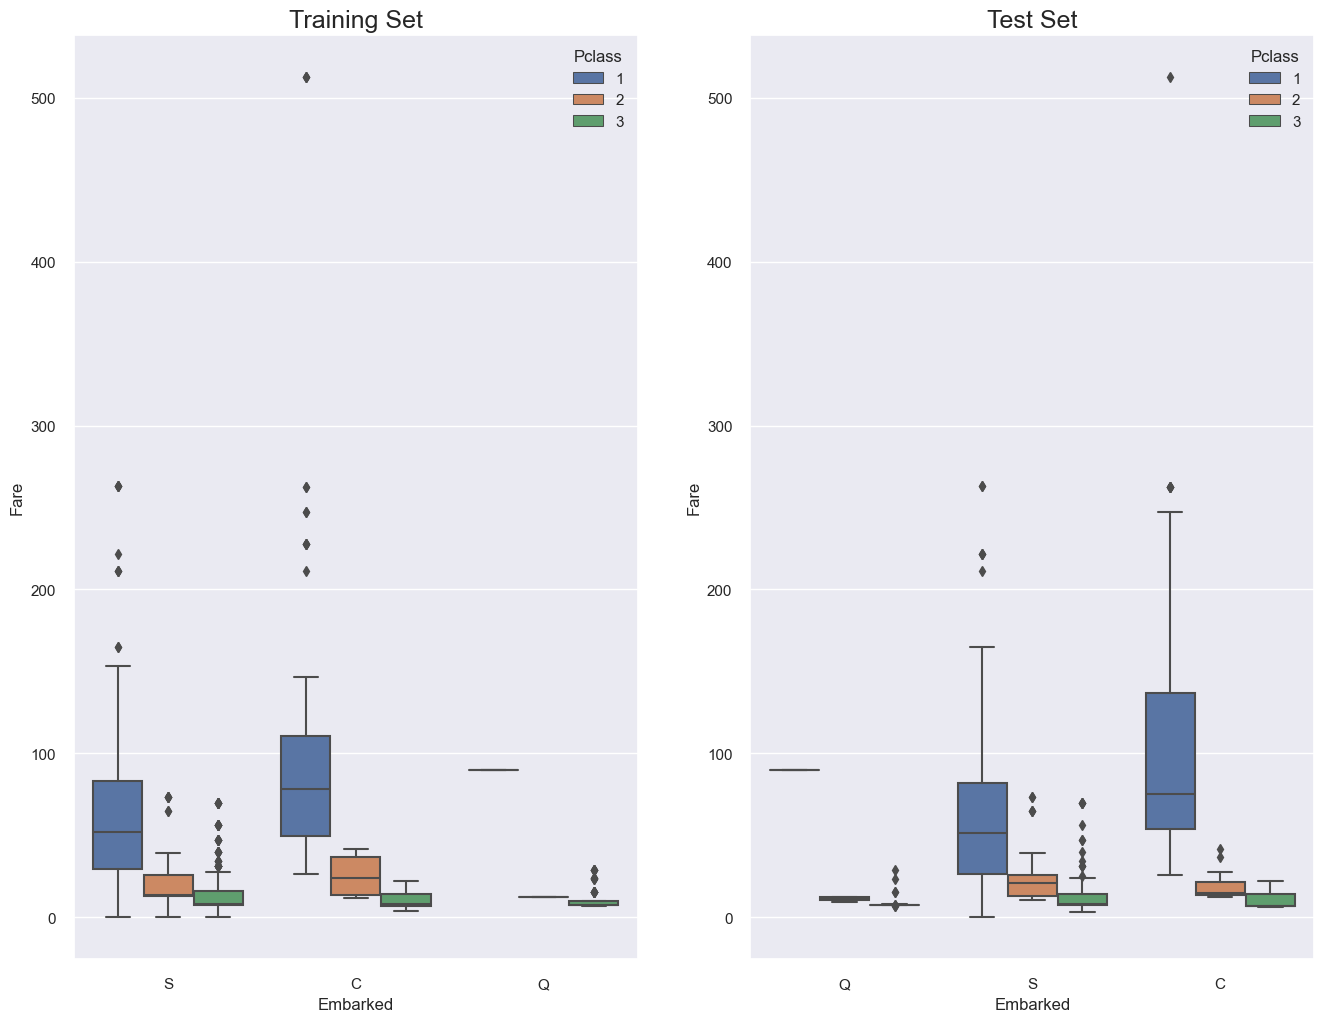

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)


# ## Fixing legends
# leg_1 = ax1.get_legend()
# leg_1.set_title("PClass")
# legs = leg_1.texts
# legs[0].set_text('Upper')
# legs[1].set_text('Middle')
# legs[2].set_text('Lower')

fig.show()

In [79]:
## Replacing the null values in the Embarked column with the mode. 
train.Embarked.fillna("C", inplace=True)

In [80]:
print("Train Cabin missing: " + str(train.Cabin.isnull().sum()/len(train.Cabin)))
print("Test Cabin missing: " + str(test.Cabin.isnull().sum()/len(test.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


In [81]:
## Concat train and test into a variable "all_data"
survivers = train.Survived

train.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train,test], ignore_index=False)

## Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)

In [82]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [83]:
percent_value_counts(all_data, "Cabin")

,Total,Percent
Cabin,,
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [84]:
all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [85]:
def cabin_estimator(i):
    """Grouping cabin feature by the first letter"""
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

In [86]:
with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

In [87]:
##applying cabin estimator function. 
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

## getting back train. 
all_data = pd.concat([with_N, without_N], axis=0)

## PassengerId helps us separate train and test. 
all_data.sort_values(by = 'PassengerId', inplace=True)

## Separating train and test from all_data. 
train = all_data[:891]

test = all_data[891:]

# adding saved target variable with train. 
train['Survived'] = survivers

In [88]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


In [89]:
missing_value = test[(test.Pclass == 3) & 
                     (test.Embarked == "S") & 
                     (test.Sex == "male")].Fare.mean()
## replace the test.fare null values with test.fare mean
test.Fare.fillna(missing_value, inplace=True)

In [90]:
print ("Train age missing value: " + str((train.Age.isnull().sum()/len(train))*100)+str("%"))
print ("Test age missing value: " + str((test.Age.isnull().sum()/len(test))*100)+str("%"))

Train age missing value: 19.865319865319865%
Test age missing value: 20.574162679425836%


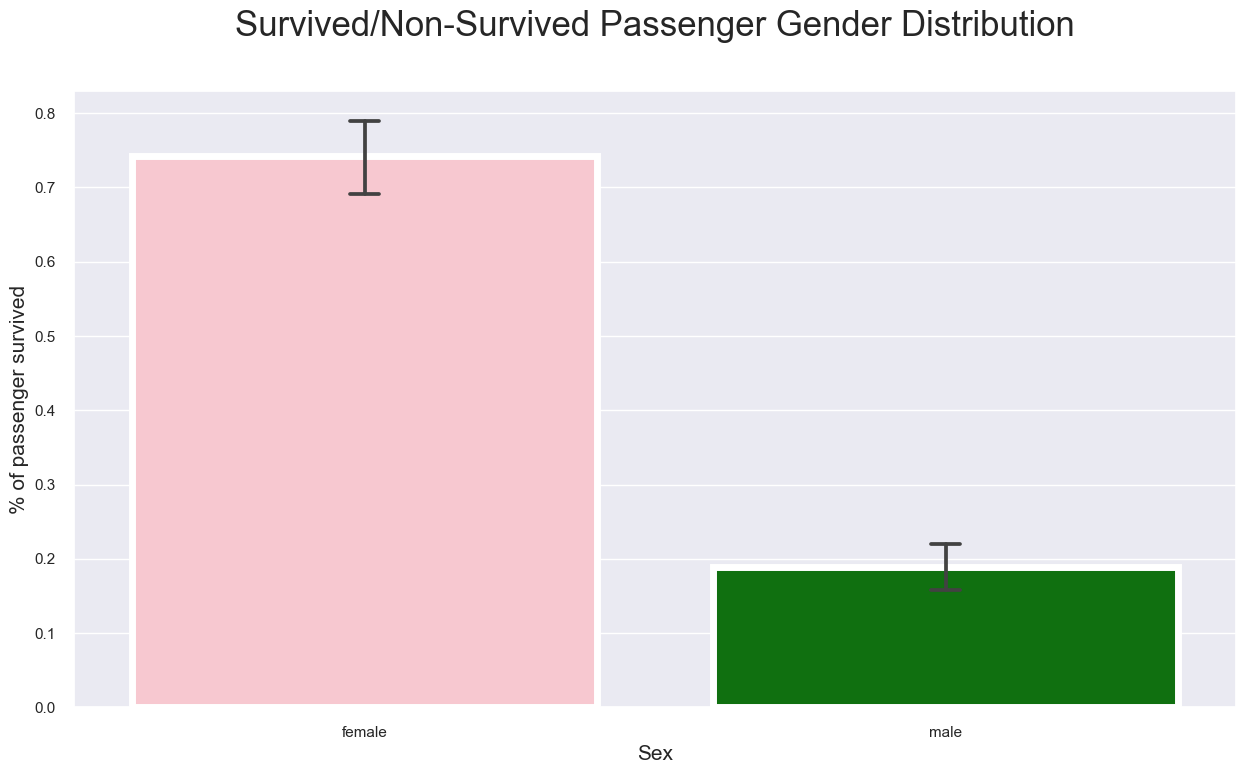

In [91]:
import seaborn as sns
pal = {'male':"green", 'female':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", 
                 y = "Survived", 
                 data=train, 
                 palette = pal,
                 linewidth=5,
                 order = ['female','male'],
                 capsize = .05,

                )

plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);

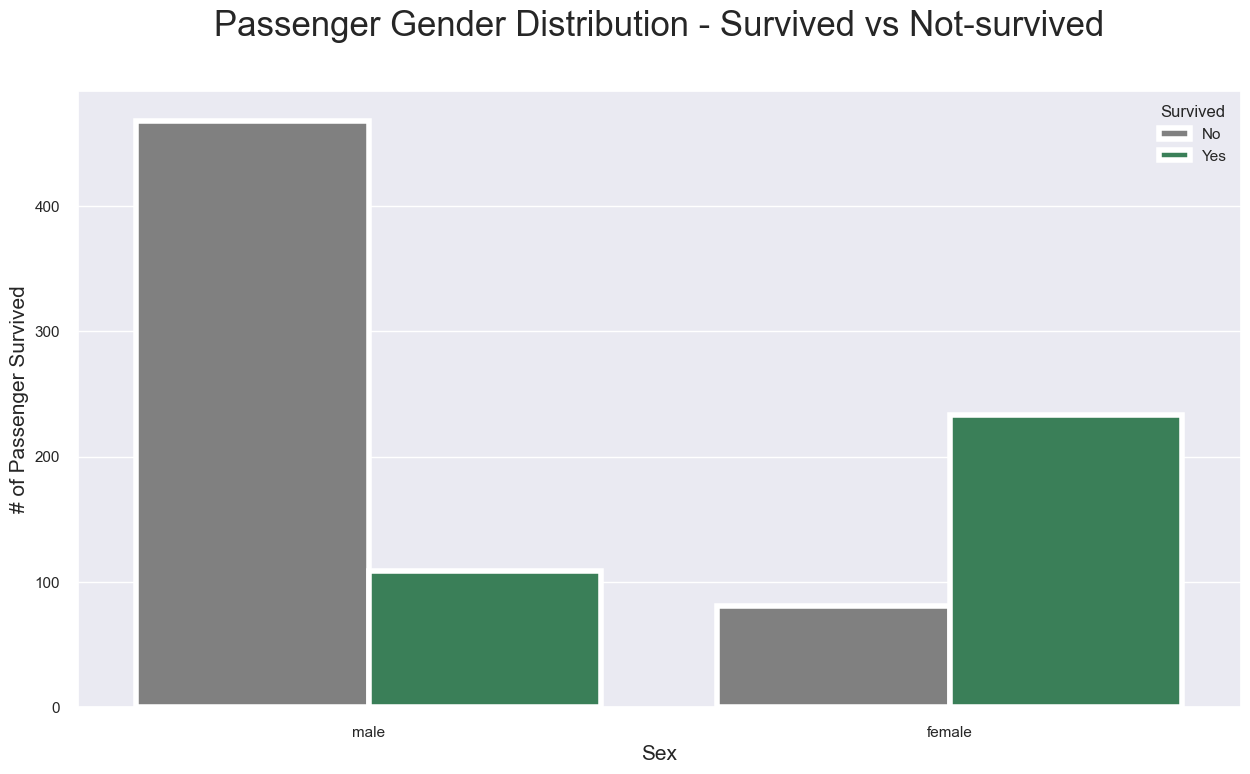

In [92]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=4, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25, pad=40)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

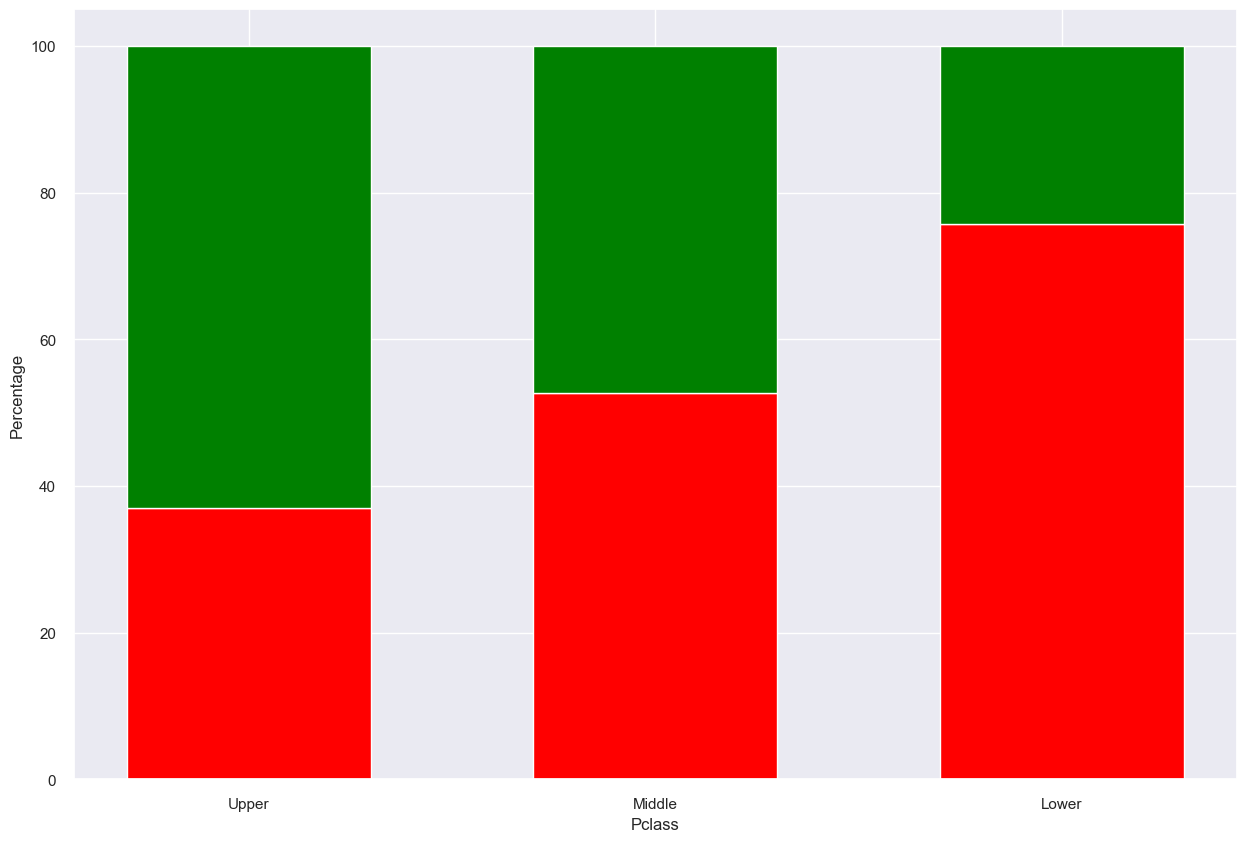

In [93]:
temp = train[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived']).count().reset_index()
temp_df = pd.pivot_table(temp, values = 'PassengerId', index = 'Pclass',columns = 'Survived')
names = ['No', 'Yes']
temp_df.columns = names
r = [0,1,2]
totals = [i+j for i, j in zip(temp_df['No'], temp_df['Yes'])]
No_s = [i / j * 100 for i,j in zip(temp_df['No'], totals)]
Yes_s = [i / j * 100 for i,j in zip(temp_df['Yes'], totals)]
## Plotting
plt.subplots(figsize = (15,10))
barWidth = 0.60
names = ('Upper', 'Middle', 'Lower')
# Create green Bars
plt.bar(r, No_s, color='Red', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, Yes_s, bottom=No_s, color='Green', edgecolor='white', width=barWidth)

 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Pclass")
plt.ylabel('Percentage')
 
# Show graphic
plt.show()

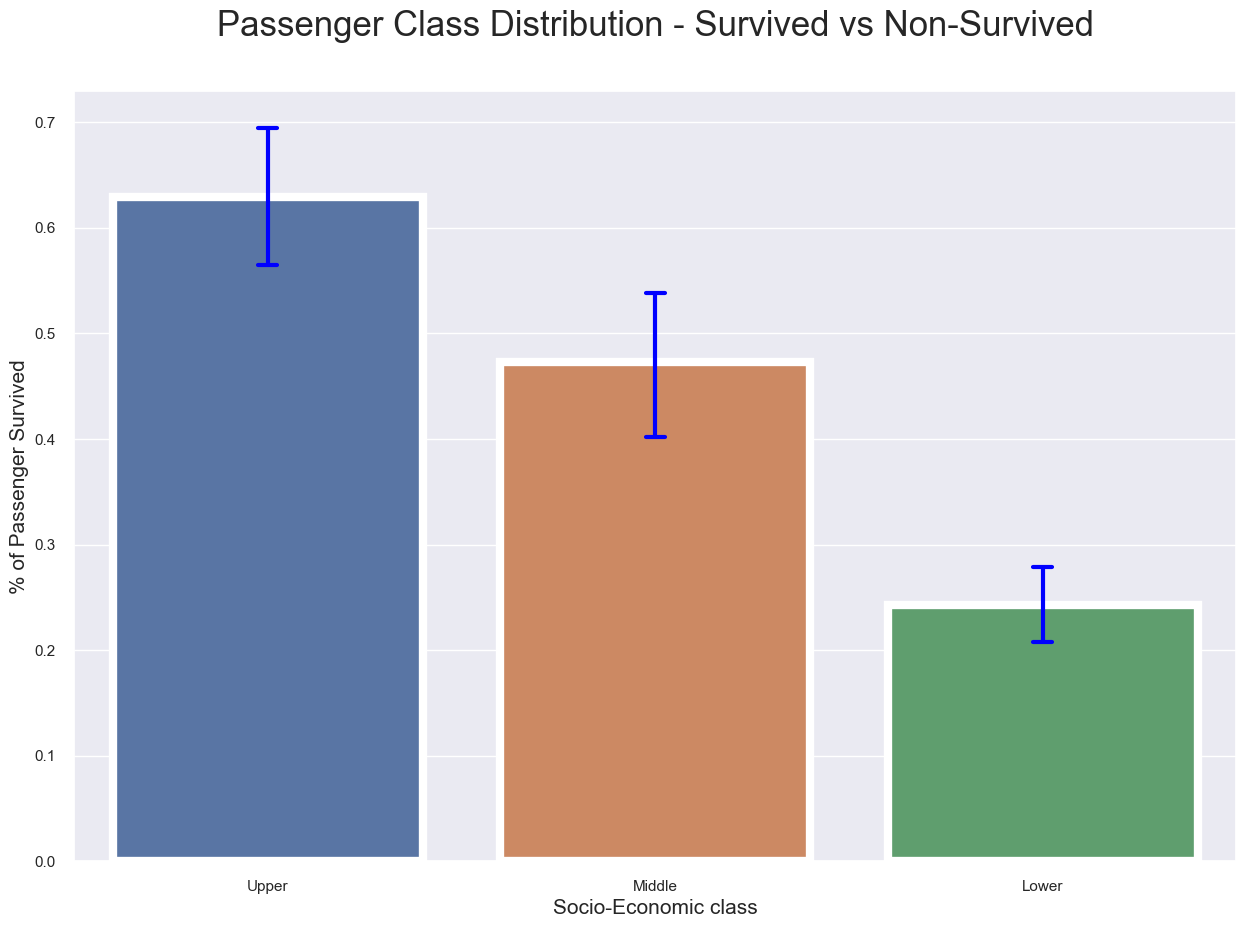

In [94]:

plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=6,
            capsize = .05,
            errcolor='blue',
            errwidth = 3
            

           )
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25, pad=40)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
names = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, names);

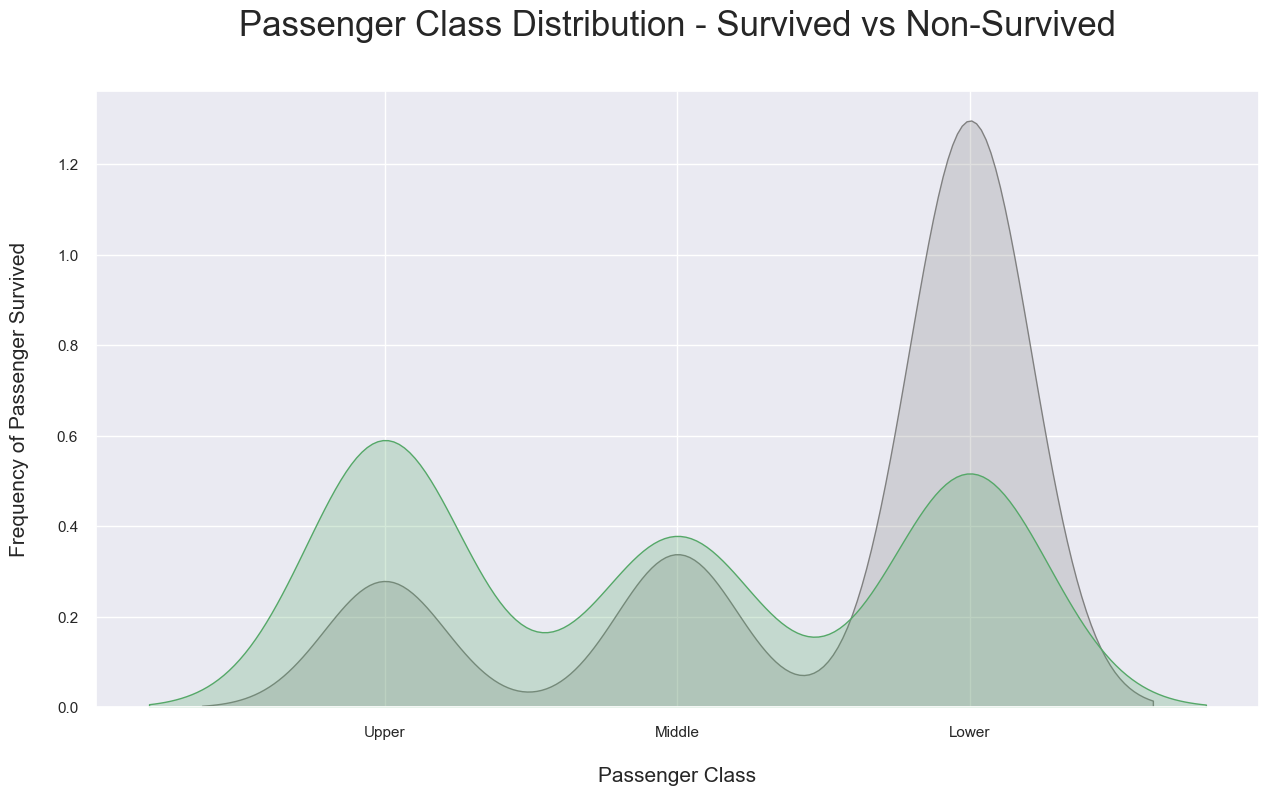

In [95]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived', 
              )
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

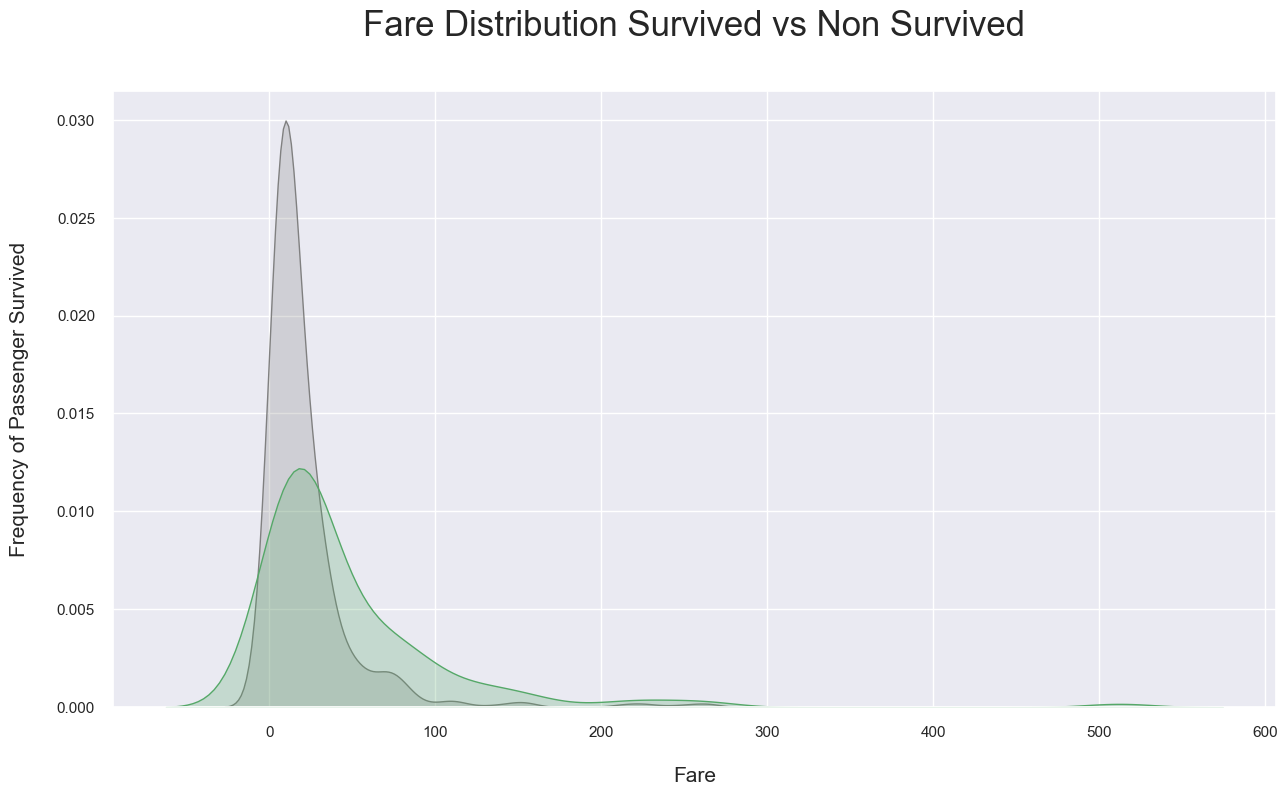

In [96]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);

In [97]:
train[train.Fare > 280]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


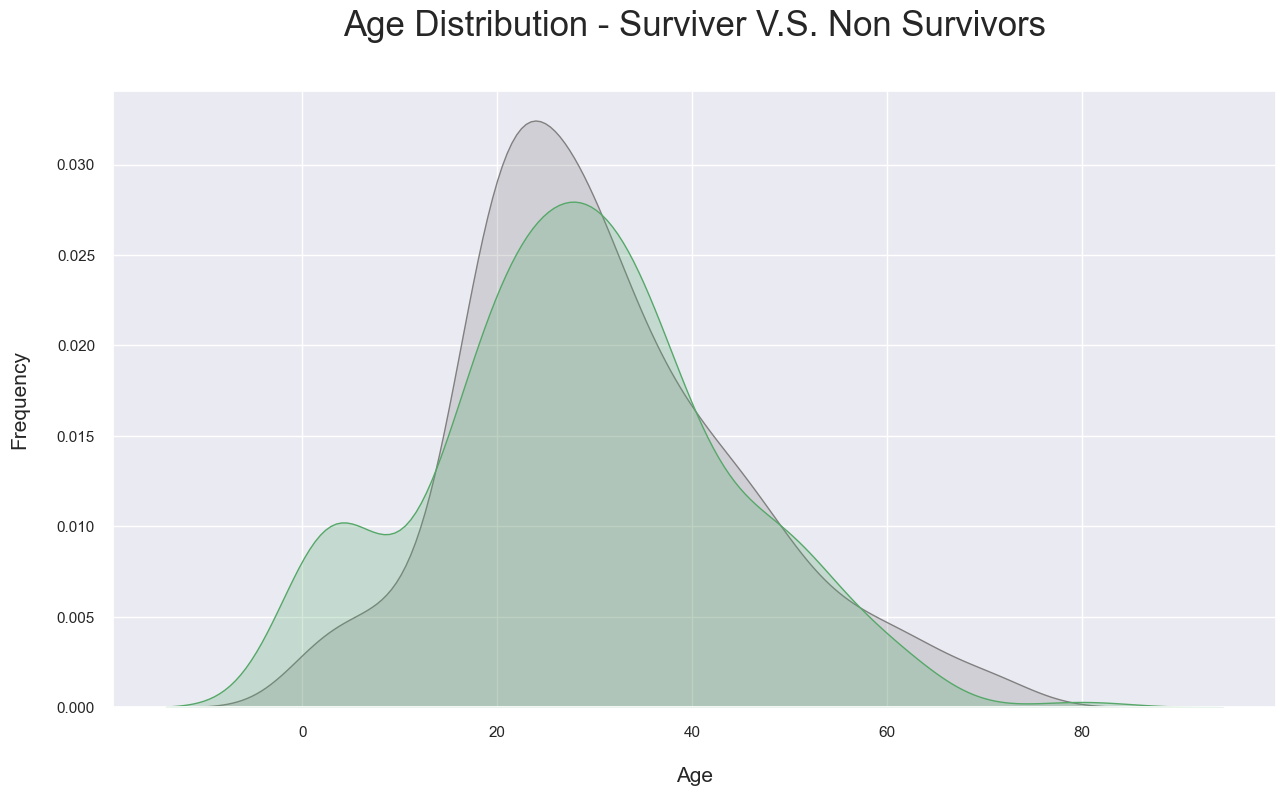

In [98]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

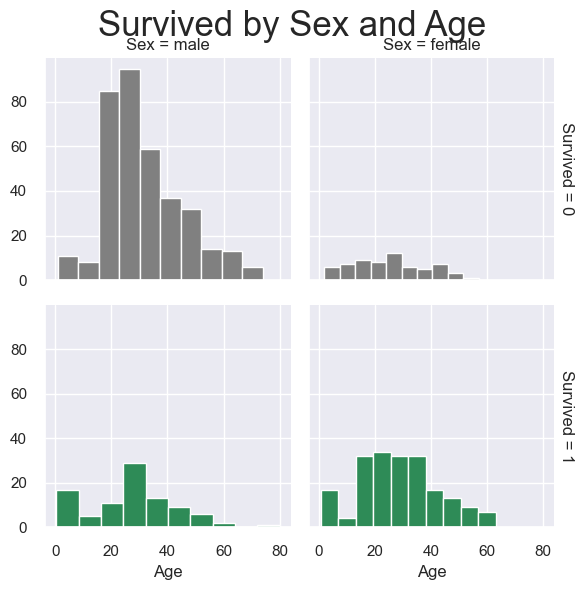

In [103]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train, col="Sex", row="Survived", 
                  margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white')
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

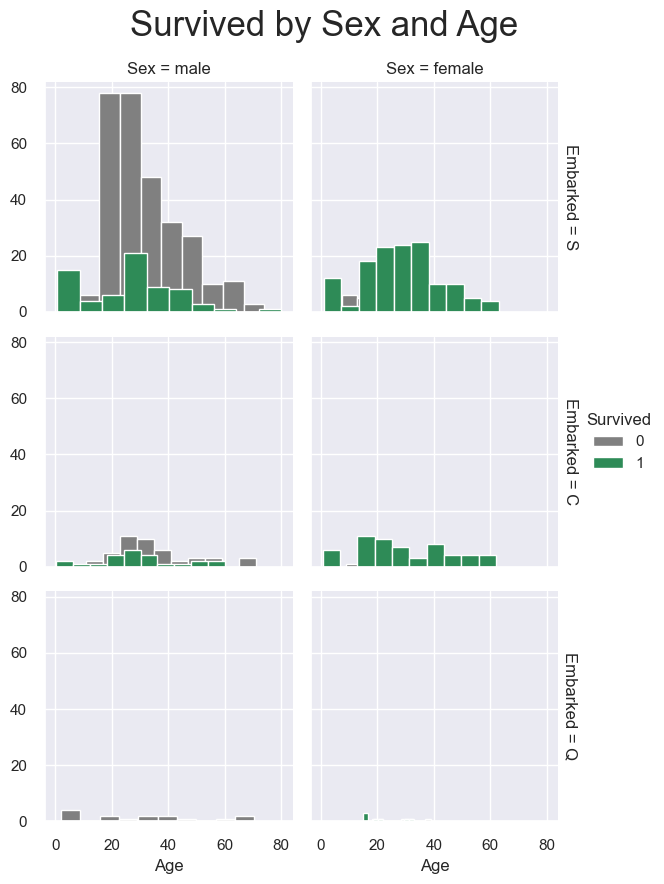

In [105]:
g = sns.FacetGrid(train, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

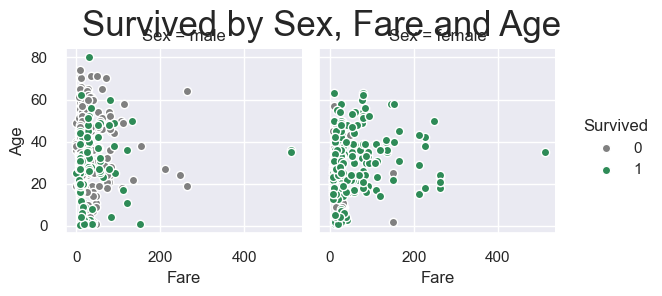

In [106]:
g = sns.FacetGrid(train,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

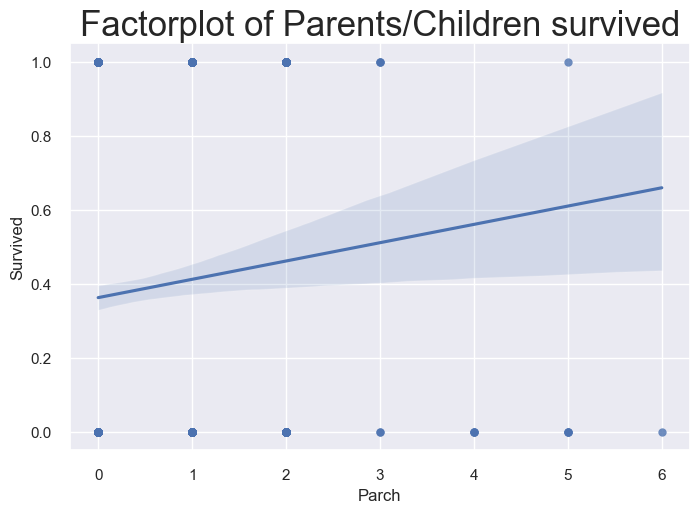

In [120]:
## dropping the three outliers where Fare is over $500 
train = train[train.Fare < 500]
## factor plot
sns.regplot(x = "Parch", y = "Survived", data = train)
plt.title("Factorplot of Parents/Children survived", fontsize = 25)
plt.subplots_adjust(top=0.85)

In [121]:
sns.factorplot(x =  "SibSp", y = "Survived", data = train,kind = "point",size = 8)
plt.title('Factorplot of Sibilings/Spouses survived', fontsize = 25)
plt.subplots_adjust(top=0.85)

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [122]:
# Placing 0 for female and 
# 1 for male in the "Sex" column. 
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

In [123]:
train.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164,0.381757
std,257.405474,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366,0.486091
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,445.500000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,1.000000,38.000000,1.000000,0.000000,30.771850,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,1.000000


In [124]:
train.describe(include =['O'])

,Name,Ticket,Cabin,Embarked
count,888,888,888,888
unique,888,680,8,3
top,"Braund, Mr. Owen Harris",347082,G,S
freq,1,7,464,644


In [125]:

# Overview(Survived vs non survied)
survived_summary = train.groupby("Survived")
survived_summary.mean().reset_index()

TypeError: Could not convert Braund, Mr. Owen HarrisAllen, Mr. William HenryMoran, Mr. JamesMcCarthy, Mr. Timothy JPalsson, Master. Gosta LeonardSaundercock, Mr. William HenryAndersson, Mr. Anders JohanVestrom, Miss. Hulda Amanda AdolfinaRice, Master. EugeneVander Planke, Mrs. Julius (Emelia Maria Vandemoortele)Fynney, Mr. Joseph JPalsson, Miss. Torborg DaniraEmir, Mr. Farred ChehabFortune, Mr. Charles AlexanderTodoroff, Mr. LalioUruchurtu, Don. Manuel EWheadon, Mr. Edward HMeyer, Mr. Edgar JosephHolverson, Mr. Alexander OskarCann, Mr. Ernest CharlesVander Planke, Miss. Augusta MariaAhlin, Mrs. Johan (Johanna Persdotter Larsson)Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)Kraeff, Mr. TheodorRogers, Mr. William JohnLennon, Mr. DenisSamaan, Mr. YoussefArnold-Franchi, Mrs. Josef (Josefine Franchi)Panula, Master. Juha NiiloNosworthy, Mr. Richard CaterOstby, Mr. Engelhart CorneliusNovel, Mr. MansouerGoodwin, Master. William FrederickSirayanian, Mr. OrsenHarris, Mr. Henry BirkhardtSkoog, Master. HaraldStewart, Mr. Albert ACrease, Mr. Ernest JamesKink, Mr. VincenzJenkin, Mr. Stephen CurnowGoodwin, Miss. Lillian AmyHood, Mr. Ambrose JrChronopoulos, Mr. ApostolosMoen, Mr. Sigurd HansenStaneff, Mr. IvanMoutal, Mr. Rahamin HaimWaelens, Mr. AchilleCarrau, Mr. Francisco MFord, Mr. William NealSlocovski, Mr. Selman FrancisCelotti, Mr. FrancescoChristmann, Mr. EmilAndreasson, Mr. Paul EdvinChaffee, Mr. Herbert FullerDean, Mr. Bertram FrankCoxon, Mr. DanielShorney, Mr. Charles JosephGoldschmidt, Mr. George BKantor, Mr. SinaiPetranec, Miss. MatildaPetroff, Mr. Pastcho ("Pentcho")White, Mr. Richard FrasarJohansson, Mr. Gustaf JoelGustafsson, Mr. Anders VilhelmMionoff, Mr. StoytchoRekic, Mr. TidoPorter, Mr. Walter ChamberlainZabour, Miss. HileniBarton, Mr. David JohnJussila, Miss. KatriinaAttalah, Miss. MalakePekoniemi, Mr. EdvardConnors, Mr. PatrickTurpin, Mr. William John RobertBaxter, Mr. Quigg EdmondAndersson, Miss. Ellis Anna MariaHickman, Mr. Stanley GeorgeMoore, Mr. Leonard CharlesNasser, Mr. NicholasWhite, Mr. Percival WaylandMcMahon, Mr. MartinEkstrom, Mr. JohanDrazenoic, Mr. JozefCoelho, Mr. Domingos FernandeoRobins, Mrs. Alexander A (Grace Charity Laury)Sobey, Mr. Samuel James HaydenRichard, Mr. EmileFutrelle, Mr. Jacques HeathOsen, Mr. Olaf ElonGiglio, Mr. VictorBoulos, Mrs. Joseph (Sultana)Burke, Mr. JeremiahAndrew, Mr. Edgardo SamuelNicholls, Mr. Joseph CharlesFord, Miss. Robina Maggie "Ruby"Navratil, Mr. Michel ("Louis M Hoffman")Byles, Rev. Thomas Roussel DavidsBateman, Rev. Robert JamesMeo, Mr. Alfonzovan Billiard, Mr. Austin BlylerOlsen, Mr. Ole MartinWilliams, Mr. Charles DuaneCorn, Mr. HarrySmiljanic, Mr. MileSage, Master. Thomas HenryCribb, Mr. John HatfieldBengtsson, Mr. John ViktorCalic, Mr. JovoPanula, Master. Eino ViljamiSkoog, Mrs. William (Anna Bernhardina Karlsson)Baumann, Mr. John DLing, Mr. LeeVan der hoef, Mr. WyckoffRice, Master. ArthurSivola, Mr. Antti WilhelmSmith, Mr. James ClinchKlasen, Mr. Klas AlbinLefebre, Master. Henry ForbesIsham, Miss. Ann ElizabethHale, Mr. ReginaldLeonard, Mr. LionelSage, Miss. Constance GladysPernot, Mr. ReneAsplund, Master. Clarence Gustaf HugoRood, Mr. Hugh RoscoeBourke, Mr. JohnTurcin, Mr. StjepanCarbines, Mr. WilliamMernagh, Mr. RobertOlsen, Mr. Karl Siegwart AndreasYrois, Miss. Henriette ("Mrs Harbeck")Vande Walle, Mr. Nestor CyrielSage, Mr. FrederickJohanson, Mr. Jakob AlfredYouseff, Mr. GeriousStrom, Miss. Telma MatildaBackstrom, Mr. Karl AlfredAli, Mr. AhmedPerkin, Mr. John HenryGivard, Mr. Hans KristensenKiernan, Mr. PhilipJacobsohn, Mr. Sidney SamuelHarris, Mr. WalterBracken, Mr. James HGreen, Mr. George HenryNenkoff, Mr. ChristoBerglund, Mr. Karl Ivar SvenLovell, Mr. John Hall ("Henry")Fahlstrom, Mr. Arne JonasLefebre, Miss. MathildeLarsson, Mr. Bengt EdvinSjostedt, Mr. Ernst AdolfLeyson, Mr. Robert William NormanHarknett, Miss. Alice PhoebeHold, Mr. StephenPengelly, Mr. Frederick WilliamHunt, Mr. George HenryZabour, Miss. ThamineColeridge, Mr. Reginald CharlesMaenpaa, Mr. Matti AlexanteriAttalah, Mr. SleimanMinahan, Dr. William EdwardLindahl, Miss. Agda Thorilda ViktoriaCarter, Rev. Ernest CourtenayReed, Mr. James GeorgeStrom, Mrs. Wilhelm (Elna Matilda Persson)Stead, Mr. William ThomasLobb, Mr. William ArthurRosblom, Mrs. Viktor (Helena Wilhelmina)Smith, Mr. ThomasTaussig, Mr. EmilHarrison, Mr. WilliamHenry, Miss. DeliaReeves, Mr. DavidPanula, Mr. Ernesti ArvidCairns, Mr. AlexanderNatsch, Mr. Charles HLindblom, Miss. Augusta CharlottaParkes, Mr. Francis "Frank"Rice, Master. EricDuane, Mr. FrankOlsson, Mr. Nils Johan Goranssonde Pelsmaeker, Mr. AlfonsSmith, Mr. Richard WilliamStankovic, Mr. IvanNaidenoff, Mr. PenkoLevy, Mr. Rene JacquesHaas, Miss. AloisiaMineff, Mr. IvanLewy, Mr. Ervin GHanna, Mr. MansourAllison, Miss. Helen LoraineJohnson, Mr. William Cahoone JrWilliams, Mr. Howard Hugh "Harry"Abelson, Mr. SamuelLahtinen, Mrs. William (Anna Sylfven)Hendekovic, Mr. IgnjacHart, Mr. BenjaminMoraweck, Dr. ErnestDennis, Mr. SamuelDanoff, Mr. YotoSage, Mr. George John JrNysveen, Mr. Johan HansenPartner, Mr. AustenGraham, Mr. George EdwardVander Planke, Mr. Leo EdmondusDenkoff, Mr. MittoPears, Mr. Thomas ClintonBlackwell, Mr. Stephen WeartCollander, Mr. Erik GustafSedgwick, Mr. Charles Frederick WaddingtonFox, Mr. Stanley HubertDimic, Mr. JovanOdahl, Mr. Nils MartinWilliams-Lambert, Mr. Fletcher FellowsElias, Mr. TannousArnold-Franchi, Mr. JosefYousif, Mr. WazliVanden Steen, Mr. Leo PeterFunk, Miss. Annie ClemmerSkoog, Mr. Wilhelmdel Carlo, Mr. SebastianoBarbara, Mrs. (Catherine David)Asim, Mr. AdolaO'Brien, Mr. ThomasAdahl, Mr. Mauritz Nils MartinWiklund, Mr. Jakob AlfredBeavan, Mr. William ThomasRinghini, Mr. SantePalsson, Miss. Stina ViolaWidener, Mr. Harry ElkinsBetros, Mr. TannousGustafsson, Mr. Karl GideonTikkanen, Mr. JuhoPlotcharsky, Mr. VasilDavies, Mr. Charles HenryGoodwin, Master. Sidney LeonardSadlier, Mr. MatthewGustafsson, Mr. Johan BirgerJohansson, Mr. ErikOlsson, Miss. ElinaMcKane, Mr. Peter DavidPain, Dr. AlfredAdams, Mr. JohnJussila, Miss. Mari AinaHakkarainen, Mr. Pekka PietariOreskovic, Miss. MarijaGale, Mr. ShadrachWidegren, Mr. Carl/Charles PeterBirkeland, Mr. Hans Martin MonsenLefebre, Miss. IdaSdycoff, Mr. TodorHart, Mr. HenryCunningham, Mr. Alfred FlemingMeek, Mrs. Thomas (Annie Louise Rowley)Matthews, Mr. William JohnVan Impe, Miss. CatharinaGheorgheff, Mr. StanioCharters, Mr. DavidZimmerman, Mr. LeoDanbom, Mrs. Ernst Gilbert (Anna Sigrid Maria Brogren)Rosblom, Mr. Viktor RichardWiseman, Mr. PhillippeFlynn, Mr. JamesKallio, Mr. Nikolai ErlandSilvey, Mr. William BairdFord, Miss. Doolina Margaret "Daisy"Fortune, Mr. MarkKvillner, Mr. Johan Henrik JohannessonHampe, Mr. LeonPetterson, Mr. Johan EmilWest, Mr. Edwy ArthurHagland, Mr. Ingvald Olai OlsenForeman, Mr. Benjamin LaventallPeduzzi, Mr. JosephMillet, Mr. Francis DavisO'Connor, Mr. MauriceMorley, Mr. WilliamGee, Mr. Arthur HMilling, Mr. Jacob ChristianMaisner, Mr. SimonGoncalves, Mr. Manuel EstanslasCampbell, Mr. WilliamSmart, Mr. John MontgomeryScanlan, Mr. JamesKeefe, Mr. ArthurCacic, Mr. LukaStrandberg, Miss. Ida SofiaClifford, Mr. George QuincyRenouf, Mr. Peter HenryBraund, Mr. Lewis RichardKarlsson, Mr. Nils AugustGoodwin, Master. Harold VictorFrost, Mr. Anthony Wood "Archie"Rouse, Mr. Richard HenryLefebre, Miss. JeannieKent, Mr. Edward AustinSomerton, Mr. Francis WilliamHagland, Mr. Konrad Mathias ReiersenWindelov, Mr. EinarMolson, Mr. Harry MarklandArtagaveytia, Mr. RamonStanley, Mr. Edward RolandYousseff, Mr. GeriousShellard, Mr. Frederick WilliamAllison, Mrs. Hudson J C (Bessie Waldo Daniels)Svensson, Mr. OlofCalic, Mr. PetarCanavan, Miss. MaryO'Sullivan, Miss. Bridget MaryLaitinen, Miss. Kristina SofiaPenasco y Castellana, Mr. Victor de SatodeOlsen, Mr. Henry MargidoWebber, Mr. JamesColeff, Mr. SatioWalker, Mr. William AndersonRyan, Mr. PatrickPavlovic, Mr. StefoVovk, Mr. JankoLahoud, Mr. SarkisKassem, Mr. FaredFarrell, Mr. JamesFarthing, Mr. JohnSalonen, Mr. Johan WernerHocking, Mr. Richard GeorgeToufik, Mr. NakliElias, Mr. Joseph JrCacic, Miss. MarijaButt, Major. Archibald WillinghamRisien, Mr. Samuel BeardAndersson, Miss. Ingeborg ConstanziaAndersson, Miss. Sigrid ElisabethDouglas, Mr. Walter DonaldNicholson, Mr. Arthur ErnestGoldsmith, Mr. Frank JohnSharp, Mr. Percival James RO'Brien, Mr. TimothyWright, Mr. GeorgeRobbins, Mr. VictorMorrow, Mr. Thomas RowanSivic, Mr. HuseinNorman, Mr. Robert DouglasSimmons, Mr. JohnMeanwell, Miss. (Marion Ogden)Davies, Mr. Alfred JStoytcheff, Mr. IliaPalsson, Mrs. Nils (Alma Cornelia Berglund)Doharr, Mr. TannousRush, Mr. Alfred George JohnPatchett, Mr. GeorgeCaram, Mrs. Joseph (Maria Elias)Downton, Mr. William JamesRoss, Mr. John HugoPaulner, Mr. UscherJarvis, Mr. John DenzilGilinski, Mr. EliezerMurdlin, Mr. JosephRintamaki, Mr. MattiElsbury, Mr. William JamesBourke, Miss. MaryChapman, Mr. John HenryVan Impe, Mr. Jean BaptisteJohnson, Mr. AlfredBoulos, Mr. HannaSlabenoff, Mr. PetcoHarrington, Mr. Charles HTorber, Mr. Ernst WilliamLindell, Mr. Edvard BengtssonKaraic, Mr. MilanAndersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)Jardin, Mr. Jose NetoHorgan, Mr. JohnBrocklebank, Mr. William AlfredDanbom, Mr. Ernst GilbertLobb, Mrs. William Arthur (Cordelia K Stanlick)Gavey, Mr. LawrenceYasbeck, Mr. AntoniHansen, Mr. Henry DamsgaardBowen, Mr. David John "Dai"Sutton, Mr. FrederickKirkland, Rev. Charles LeonardBostandyeff, Mr. GuentchoO'Connell, Mr. Patrick DLundahl, Mr. Johan SvenssonParr, Mr. William Henry MarshSkoog, Miss. MabelLeinonen, Mr. Antti GustafCollyer, Mr. HarveyPanula, Mrs. Juha (Maria Emilia Ojala)Thorneycroft, Mr. PercivalJensen, Mr. Hans PederSkoog, Miss. Margit ElizabethCor, Mr. LiudevitWilley, Mr. EdwardMitkoff, Mr. MitoKalvik, Mr. Johannes HalvorsenHegarty, Miss. Hanora "Nora"Hickman, Mr. Leonard MarkRadeff, Mr. AlexanderBourke, Mrs. John (Catherine)Eitemiller, Mr. George FloydNewell, Mr. Arthur WebsterBadt, Mr. MohamedColley, Mr. Edward PomeroyColeff, Mr. PejuHickman, Mr. LewisButler, Mr. Reginald FentonRommetvedt, Mr. Knud PaustCook, Mr. JacobDavidson, Mr. ThorntonMitchell, Mr. Henry MichaelWatson, Mr. Ennis HastingsEdvardsson, Mr. Gustaf HjalmarSawyer, Mr. Frederick CharlesGoodwin, Mrs. Frederick (Augusta Tyler)Peters, Miss. KatieOlsvigen, Mr. Thor AndersonGoodwin, Mr. Charles EdwardBrown, Mr. Thomas William SolomonLaroche, Mr. Joseph Philippe LemercierPanula, Mr. Jaako ArnoldDakic, Mr. BrankoFischer, Mr. Eberhard ThelanderSaad, Mr. KhalilWeir, Col. JohnChapman, Mr. Charles HenryKelly, Mr. JamesThayer, Mr. John BorlandHumblen, Mr. Adolf Mathias Nicolai OlsenBarbara, Miss. SaiideGallagher, Mr. MartinHansen, Mr. Henrik JuulMorley, Mr. Henry Samuel ("Mr Henry Marshall")Klaber, Mr. HermanLarsson, Mr. August ViktorGreenberg, Mr. SamuelSoholt, Mr. Peter Andreas Lauritz AndersenMcEvoy, Mr. MichaelJohnson, Mr. Malkolm JoackimJensen, Mr. Svend LauritzGillespie, Mr. William HenryHodges, Mr. Henry PriceOreskovic, Mr. LukaBryhl, Mr. Kurt Arnold GottfridIlmakangas, Miss. Pieta SofiaHassan, Mr. Houssein G NKnight, Mr. Robert JBerriman, Mr. William JohnTroupiansky, Mr. Moses AaronWilliams, Mr. LeslieFord, Mrs. Edward (Margaret Ann Watson)Ivanoff, Mr. KanioNankoff, Mr. MinkoCavendish, Mr. Tyrell WilliamMcNamee, Mr. NealCrosby, Capt. Edward GiffordAbbott, Mr. Rossmore EdwardMarvin, Mr. Daniel WarnerConnaghton, Mr. MichaelVande Velde, Mr. Johannes JosephJonkoff, Mr. LalioCarlsson, Mr. August SigfridBailey, Mr. Percy AndrewTheobald, Mr. Thomas LeonardGarfirth, Mr. JohnNirva, Mr. Iisakki Antino AijoEklund, Mr. Hans LinusBrewe, Dr. Arthur JacksonMangan, Miss. MaryMoran, Mr. Daniel JGronnestad, Mr. Daniel DanielsenLievens, Mr. Rene AimeJensen, Mr. Niels PederMack, Mrs. (Mary)Elias, Mr. DiboMyhrman, Mr. Pehr Fabian Oliver MalkolmTobin, Mr. RogerKilgannon, Mr. Thomas JLong, Mr. Milton ClydeJohnston, Mr. Andrew GAli, Mr. WilliamHarmer, Mr. Abraham (David Lishin)Rice, Master. George HughGuggenheim, Mr. BenjaminKeane, Mr. Andrew "Andy"Gaskell, Mr. AlfredSage, Miss. Stella AnnaHoyt, Mr. William FisherDantcheff, Mr. RistiuOtter, Mr. RichardIbrahim Shawah, Mr. YousseffVan Impe, Mrs. Jean Baptiste (Rosalie Paula Govaert)Ponesell, Mr. MartinJohansson, Mr. Karl JohanAndrews, Mr. Thomas JrPettersson, Miss. Ellen NataliaMeyer, Mr. AugustAlexander, Mr. WilliamLester, Mr. JamesSlemen, Mr. Richard JamesAndersson, Miss. Ebba Iris AlfridaTomlin, Mr. Ernest PortageFry, Mr. RichardHeininen, Miss. Wendla MariaMallet, Mr. AlbertHolm, Mr. John Fredrik AlexanderSkoog, Master. Karl ThorstenReuchlin, Jonkheer. John GeorgePanula, Master. Urho AbrahamFlynn, Mr. JohnLam, Mr. LenSaad, Mr. AminAugustsson, Mr. AlbertAllum, Mr. Owen GeorgePasic, Mr. JakobSirota, Mr. MauriceAlhomaki, Mr. Ilmari RudolfMudd, Mr. Thomas CharlesLemberopolous, Mr. Peter LCulumovic, Mr. JesoAbbing, Mr. AnthonySage, Mr. Douglas BullenMarkoff, Mr. MarinHarper, Rev. JohnAndersson, Master. Sigvard Harald EliasSvensson, Mr. JohanBoulos, Miss. NourelainCarter, Mrs. Ernest Courtenay (Lilian Hughes)Razi, Mr. RaihedHansen, Mr. Claus PeterGiles, Mr. Frederick EdwardSage, Miss. Dorothy Edith "Dolly"Gill, Mr. John WilliamRoebling, Mr. Washington Augustus IIvan Melkebeke, Mr. PhilemonBalkic, Mr. CerinCarlsson, Mr. Frans OlofVander Cruyssen, Mr. VictorGustafsson, Mr. Alfred OssianPetroff, Mr. NedelioLaleff, Mr. KristoMarkun, Mr. JohannDahlberg, Miss. Gerda UlrikaBanfield, Mr. Frederick JamesSutehall, Mr. Henry JrRice, Mrs. William (Margaret Norton)Montvila, Rev. JuozasJohnston, Miss. Catherine Helen "Carrie"Dooley, Mr. Patrick to numeric

In [126]:
survived_summary = train.groupby("Sex")
survived_summary.mean().reset_index()